In [62]:
# tree = Signal('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM_H1_H2_HX/NMSSM_XYH_YToHH_6b_MX_1200_MY_1000/ntuple.root')
# tree = Signal('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM_HX_H1_H2/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root')

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM_H1_H2_HX/NMSSM_XYH_YToHH_6b_MX_1200_MY_1000/ntuple.root


In [1]:
tree = Signal('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root')

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root


In [2]:
ak.sum(tree.HX_pt > tree.H1_pt)/len(tree.HX_pt)

NameError: name 'ak' is not defined

In [ ]:
# HX_found = (tree.HX_b1_genHflag == 0) & (tree.HX_b2_genHflag == 0)
# H1_found = (tree.H1_b1_genHflag == 1) & (tree.H1_b2_genHflag == 1)
# H2_found = (tree.H2_b1_genHflag == 2) & (tree.H2_b2_genHflag == 2)

H_b_genHflags = np.column_stack((tree.np('HX_b1_genHflag'), tree.np('HX_b2_genHflag'), tree.np('H1_b1_genHflag'), tree.np('H1_b2_genHflag'), tree.np('H2_b1_genHflag'), tree.np('H2_b2_genHflag')))

In [ ]:
found_HX_select = (H_b_genHflags == 0).sum(axis=1) == 2
found_H1_select = (H_b_genHflags == 1).sum(axis=1) == 2
found_H2_select = (H_b_genHflags == 2).sum(axis=1) == 2

n_H_selected = np.sum(np.column_stack((found_HX_select, found_H1_select, found_H2_select)), axis=1)
n_H_selected.max()

threeh_selected = n_H_selected == 3

In [3]:
HX_paired = (tree.HX_b1_genHflag == 0) & (tree.HX_b2_genHflag == 0)
H1_paired = (tree.H1_b1_genHflag == 1) & (tree.H1_b2_genHflag == 1)
H2_paired = (tree.H2_b1_genHflag == 2) & (tree.H2_b2_genHflag == 2)


n_h_paired = np.sum(np.column_stack((HX_paired, H1_paired, H2_paired)), axis=1)
all_H_paired = HX_paired & H1_paired & H2_paired

n_h_paired

<Array [3, 0, 1, 1, 0, 3, ... 0, 0, 0, 0, 0, 0] type='40300 * int64'>

In [6]:
round(ak.sum(HX_paired) / len(HX_paired),2), round(ak.sum(H1_paired) / len(H1_paired),2), round(ak.sum(H2_paired) / len(HX_paired),2)

(0.12, 0.14, 0.17)

In [67]:
tree.mxmy

'MX_1200_MY_1000'

In [68]:
ak.sum(tree.HX_pt > tree.H1_pt)

21

(array([0.00614   , 0.13565204, 0.54756593, 0.31064203]),
 array([0.11491007, 0.26554539, 0.        , 0.61954453]))

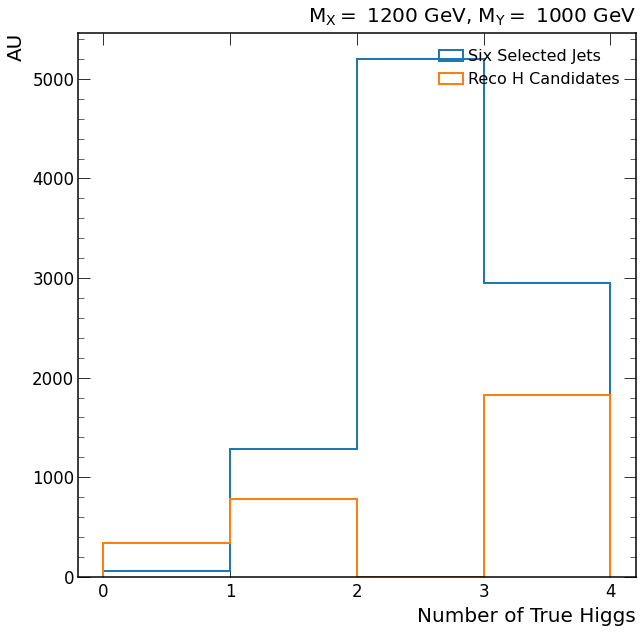

In [91]:
fig, ax = plt.subplots()

n1 = tree.hist(n_H_selected, bins=np.arange(5), ax=ax, label='Six Selected Jets')
n2 = tree.hist(n_h_paired[threeh_selected], bins=np.arange(5), ax=ax, label='Reco H Candidates')
# n3 = tree.hist(n_h_paired[n_H_selected == 3], bins=np.arange(5), ax=ax)

# ax.set_ylim(0, 6000)

ax.set_xlabel('Number of True Higgs')

fig.savefig(f'plots/3_hlo_reconstruction/bias/{tree.mxmy}_nH_1D.pdf')
# fig.savefig(f'plots/3_hlo_reconstruction/bias/{tree.mxmy}_nH_1D_H1H2HX.pdf')

n1/n1.sum(), n2/n2.sum()

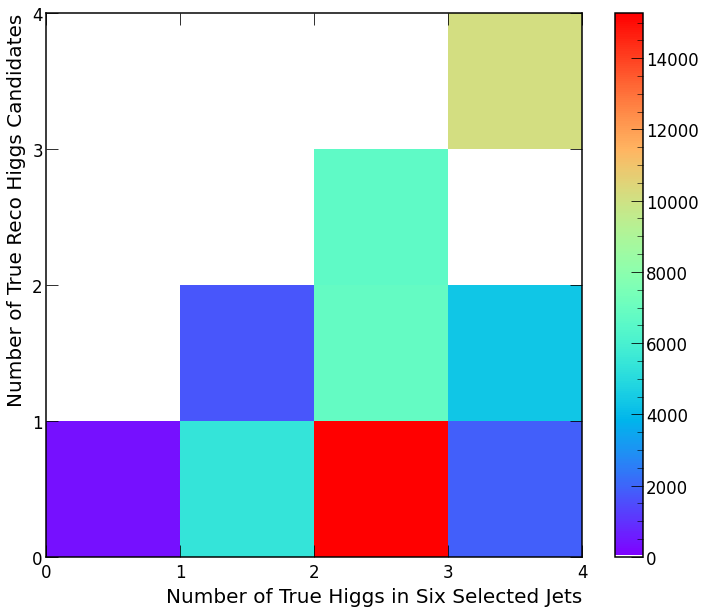

In [83]:
fig, ax = plt.subplots(figsize=(12,10))

n, ex, ey, im = Hist2d(n_H_selected, n_h_paired, bins=np.arange(5), ax=ax)

ax.set_xlabel('Number of True Higgs in Six Selected Jets')
ax.set_ylabel('Number of True Reco Higgs Candidates')

fig.colorbar(im, ax=ax)

ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))

ax.minorticks_off()

# fig.savefig(f'plots/3_hlo_reconstruction/bias/{tree.mxmy}_nH_2D_H1H2HX.pdf')
fig.savefig(f'plots/3_hlo_reconstruction/bias/{tree.mxmy}_nH_2D.pdf')

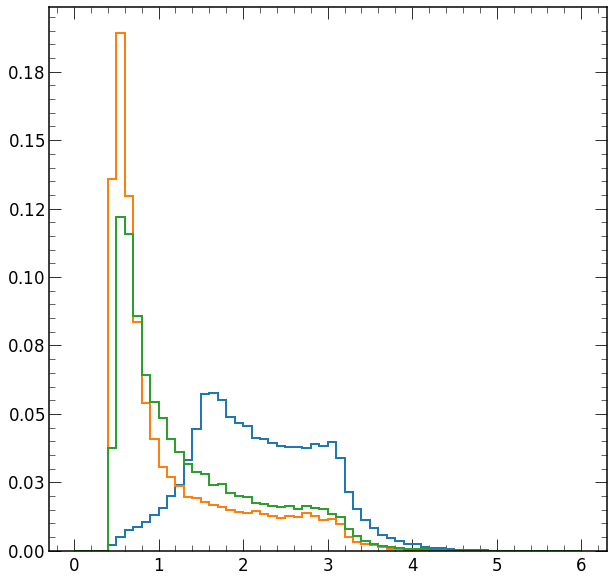

In [16]:
fig, ax = plt.subplots()

_ = Hist(tree.HX_dr, bins=np.linspace(0,6,61), ax=ax)
_ = Hist(tree.H1_dr, bins=np.linspace(0,6,61), ax=ax)
_ = Hist(tree.H2_dr, bins=np.linspace(0,6,61), ax=ax)

In [17]:
from utils.analysis.particle import Particle

In [76]:
gen_reco_HX_b1 = Particle(tree, 'gen_HX_b1_recojet')
gen_reco_HX_b2 = Particle(tree, 'gen_HX_b2_recojet')
gen_reco_H1_b1 = Particle(tree, 'gen_H1_b1_recojet')
gen_reco_H1_b2 = Particle(tree, 'gen_H1_b2_recojet')
gen_reco_H2_b1 = Particle(tree, 'gen_H2_b1_recojet')
gen_reco_H2_b2 = Particle(tree, 'gen_H2_b2_recojet')

gen_reco_HX = gen_reco_HX_b1 + gen_reco_HX_b2
gen_reco_H1 = gen_reco_H1_b1 + gen_reco_H1_b2
gen_reco_H2 = gen_reco_H2_b1 + gen_reco_H2_b2

HX_b1 = Particle(tree, 'HX_b1')
HX_b2 = Particle(tree, 'HX_b2')
H1_b1 = Particle(tree, 'H1_b1')
H1_b2 = Particle(tree, 'H1_b2')
H2_b1 = Particle(tree, 'H2_b1')
H2_b2 = Particle(tree, 'H2_b2')

HX = HX_b1 + HX_b2
H1 = H1_b1 + H1_b2
H2 = H2_b1 + H2_b2

In [52]:
def all_pairs(lst):
    if len(lst) < 2:
        yield []
        return
    if len(lst) % 2 == 1:
        # Handle odd length list
        for i in range(len(lst)):
            for result in all_pairs(lst[:i] + lst[i+1:]):
                yield result
    else:
        a = lst[0]
        for i in range(1,len(lst)):
            pair = (a,lst[i])
            for rest in all_pairs(lst[1:i]+lst[i+1:]):
                yield [pair] + rest

In [53]:
pairs = []
for x in all_pairs([0,1,2,3,4,5]): pairs.append(x)

In [77]:
gen_reco_HX_pt = gen_reco_HX.pt[sixb_events]
gen_reco_H1_pt = gen_reco_H1.pt[sixb_events]
gen_reco_H2_pt = gen_reco_H2.pt[sixb_events]

HX_pt = HX.pt[sixb_events]
H1_pt = H1.pt[sixb_events]
H2_pt = H2.pt[sixb_events]

In [78]:
gen_reco_HX_dr = gen_reco_HX_b1.deltaR(gen_reco_HX_b2)[sixb_events]
gen_reco_H1_dr = gen_reco_H1_b1.deltaR(gen_reco_H1_b2)[sixb_events]
gen_reco_H2_dr = gen_reco_H2_b1.deltaR(gen_reco_H2_b2)[sixb_events]

HX_dr = HX_b1.deltaR(HX_b2)[sixb_events]
H1_dr = H1_b1.deltaR(H1_b2)[sixb_events]
H2_dr = H2_b1.deltaR(H2_b2)[sixb_events]

In [79]:
gen_reco_H_dr = np.column_stack((gen_reco_HX_dr.to_numpy(), gen_reco_H1_dr.to_numpy(), gen_reco_H2_dr.to_numpy()))
H_dr = np.column_stack((HX_dr.to_numpy(), H1_dr.to_numpy(), H2_dr.to_numpy()))

array([3760.54248485,   14.66345455,  106.80787879])

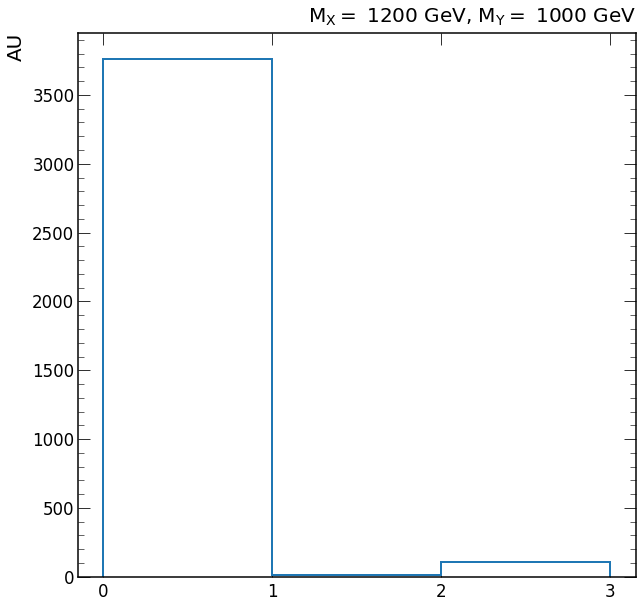

In [80]:
fig, ax = plt.subplots()

tree.hist(gen_reco_H_dr.argmax(axis=1), bins=np.arange(4), ax=ax)

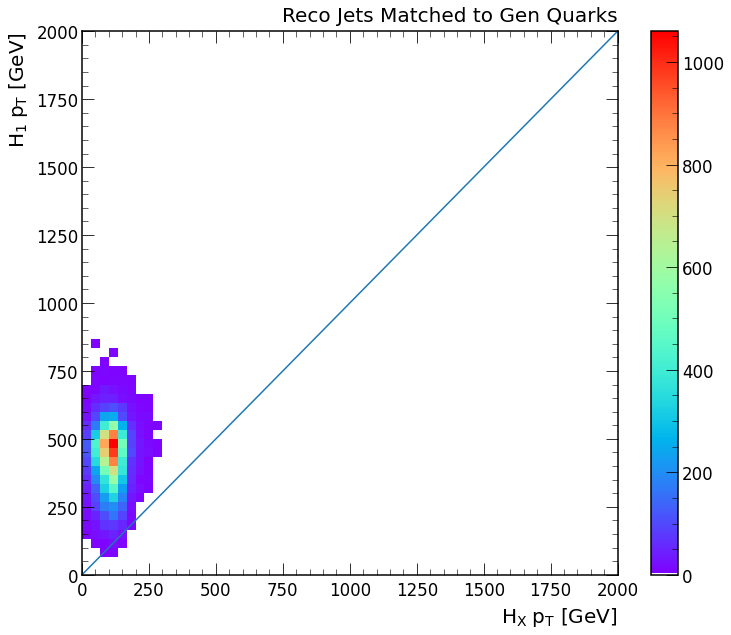

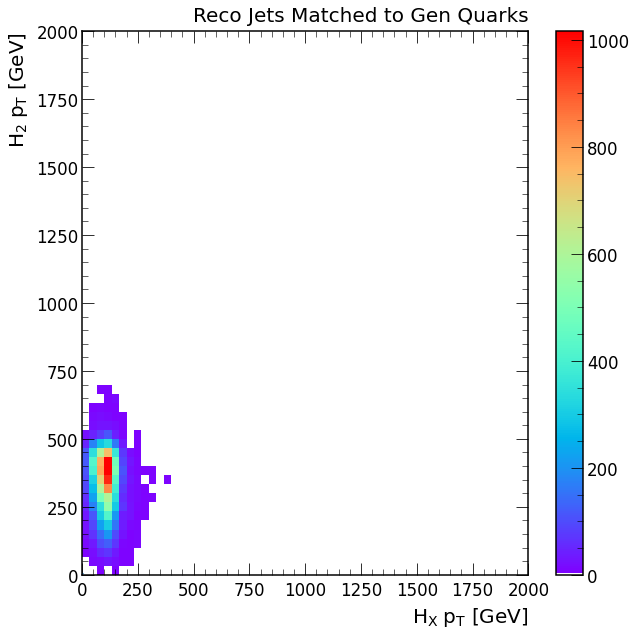

In [81]:
fig, ax = plt.subplots(figsize=(12,10))

n, ex, ey, im = Hist2d(gen_reco_HX_pt, gen_reco_H1_pt, bins=np.linspace(0,2000,61), ax=ax)
ax.set_title('Reco Jets Matched to Gen Quarks')

ax.set_xlabel(r"$H_X \; p_T$ [GeV]")
ax.set_ylabel(r"$H_1 \; p_T$ [GeV]")

ax.plot([0,2000],[0,2000])

fig.colorbar(im, ax=ax)


fig, ax = plt.subplots()

n, ex, ey, im = Hist2d(gen_reco_HX_pt, gen_reco_H2_pt, bins=np.linspace(0,2000,61), ax=ax)
ax.set_title('Reco Jets Matched to Gen Quarks')

ax.set_xlabel(r"$H_X \; p_T$ [GeV]")
ax.set_ylabel(r"$H_2 \; p_T$ [GeV]")

fig.colorbar(im, ax=ax)

ax.plot([0,4],[0,4])

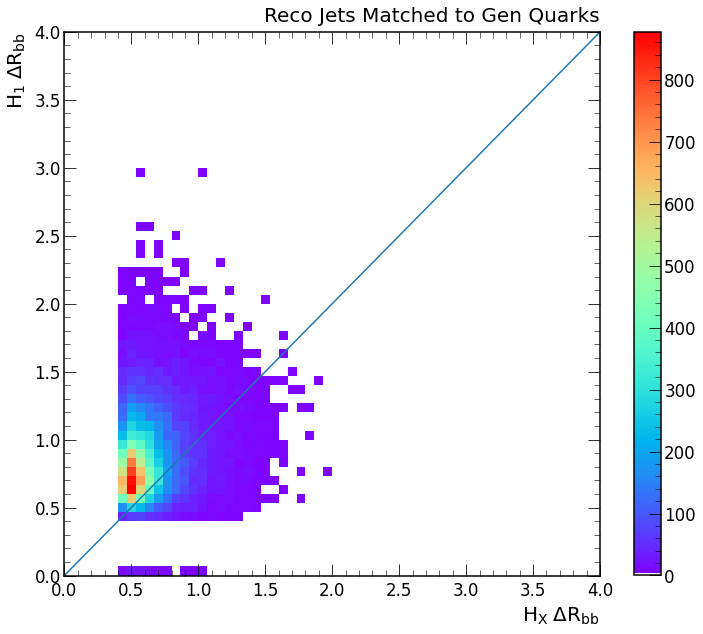

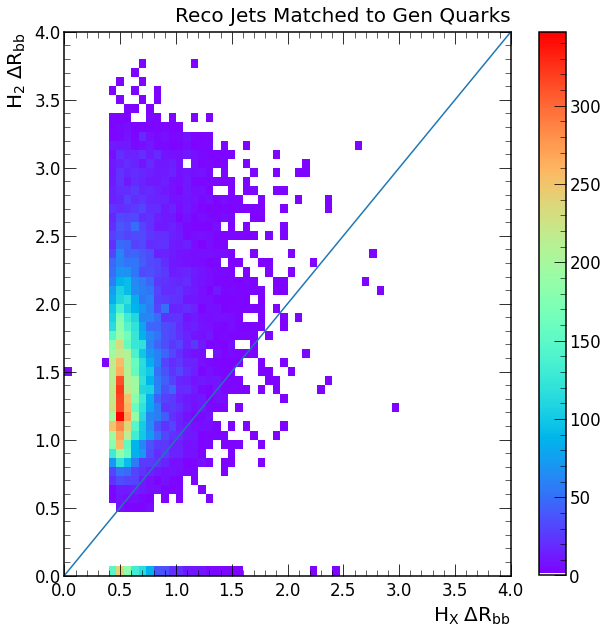

In [72]:
fig, ax = plt.subplots(figsize=(12,10))

n, ex, ey, im = Hist2d(gen_reco_HX_dr, gen_reco_H1_dr, bins=np.linspace(0,4,61), ax=ax)
ax.set_title('Reco Jets Matched to Gen Quarks')

ax.set_xlabel(r"$H_X \; \Delta R_{bb}$")
ax.set_ylabel(r"$H_1 \; \Delta R_{bb}$")

ax.plot([0,4],[0,4])

fig.colorbar(im, ax=ax)

fig, ax = plt.subplots()

n, ex, ey, im = Hist2d(gen_reco_HX_dr, gen_reco_H2_dr, bins=np.linspace(0,4,61), ax=ax)
ax.set_title('Reco Jets Matched to Gen Quarks')

ax.set_xlabel(r"$H_X \; \Delta R_{bb}$")
ax.set_ylabel(r"$H_2 \; \Delta R_{bb}$")

fig.colorbar(im, ax=ax)

ax.plot([0,4],[0,4])

In [42]:
ak.sum(tree.H1_dr < tree.HX_dr)/len(tree.HX_dr)

0.44290804207668816

In [ ]:
reco_b_all_H = []
for i in range(6):
    particle = Particle(kin_dict={
        'pt' : tree.jet_ptRegressed[tree.jet_signalId == i][all_H_mask],
        'eta' : tree.jet_eta[tree.jet_signalId == i][all_H_mask],
        'phi' : tree.jet_phi[tree.jet_signalId == i][all_H_mask],
        'm' : tree.jet_m[tree.jet_signalId == i][all_H_mask]
    })

    reco_b_all_H.append(particle)

In [25]:
tree.pt6bsum

<Array [1.05e+03, 666, ... 1.08e+03, 1.38e+03] type='47152 * float32'>